In [1]:
#Load SPARSim 
library(SPARSim)

## Create the simulation parameter

In [2]:
# Simulate
# - 1 condition
# - 8 genes (skewed internal distribution)
# - 300 cells
# - equal library size

# Number of genes
N_gene <- 8 

# Gene intensity
gene_int <- c(  80,  30,   15,  10,  10,   5,   3,   0) 
# Gene variability
gene_var <- c(0.05, 0.1,  0.1, 0.2, 0.5, 1.0, 5.0, 1.0) 

# Gene names
gene_IDs <- c("Gene_1", "Gene_2" ,"Gene_3", "Gene_4", "Gene_5", "Gene_6", "Gene_7", "Gene_8") 

# Number of cells to simulated
N_cell <- 300 

# 300 cells with a constant library size of 50 
lib_size <- rep(50, times = N_cell)

In [3]:
# create SPARSim simulation parameter
cond_A_param <- SPARSim_create_simulation_parameter(
                    intensity =  gene_int ,
                    variability = gene_var,
                    library_size = lib_size,
                    feature_names = gene_IDs, 
                    sample_names = paste0("example_cell_",c(1:N_cell)), 
                    condition_name = "example")

## Check the simulation parameter

In [4]:
class(cond_A_param) # type

[1] "list"

In [5]:
names(cond_A_param) # elements

[1] "intensity"   "variability" "lib_size"    "name"

In [6]:
head(cond_A_param$intensity)

Gene_1 Gene_2 Gene_3 Gene_4 Gene_5 Gene_6 
    80     30     15     10     10      5

In [7]:
head(cond_A_param$variability)

Gene_1 Gene_2 Gene_3 Gene_4 Gene_5 Gene_6 
  0.05   0.10   0.10   0.20   0.50   1.00

In [8]:
head(cond_A_param$lib_size)

example_cell_1 example_cell_2 example_cell_3 example_cell_4 example_cell_5 
            50             50             50             50             50 
example_cell_6 
            50

In [9]:
head(cond_A_param$name)

[1] "example"

## Simulate with SPARSim

In [18]:
SPARSim_sim_param <- list(cond_A_param)
sim_result <- SPARSim_simulation(dataset_parameter = SPARSim_sim_param)

Number of experimental conditions:  1 
Number of genes:  8 
Number of cells:  300 
Setting gene expression intensity...  
Setting gene expression variability ...  
Simulating biological variability ...  
Simulating technical variability ...  


## Check simulation results

In [19]:
class(sim_result)

[1] "list"

In [20]:
names(sim_result)

[1] "count_matrix"         "gene_matrix"          "abundance_matrix"    
[4] "variability_matrix"   "batch_factors_matrix"

### Simulated gene expression level

In [21]:
# Simulated gene expression level
gene_expr <- sim_result$gene_matrix

# check dimensions
dim(gene_expr)

[1]   8 300

In [22]:
# round data to make example easy
gene_expr <- round(gene_expr)

# take a look inside simulated gene expression level matrix
gene_expr

,example_cell_1,example_cell_2,example_cell_3,example_cell_4,example_cell_5,example_cell_6,example_cell_7,example_cell_8,example_cell_9,example_cell_10,⋯,example_cell_291,example_cell_292,example_cell_293,example_cell_294,example_cell_295,example_cell_296,example_cell_297,example_cell_298,example_cell_299,example_cell_300
Gene_1,95,102,109,54,83,79,74,110,79,69,⋯,66,99,107,92,71,63,81,89,94,69
Gene_2,13,39,42,39,21,30,39,38,45,53,⋯,19,44,21,36,22,23,20,39,38,35
Gene_3,12,7,17,12,15,14,18,27,22,8,⋯,9,9,17,17,15,20,11,9,19,6
Gene_4,7,5,17,9,6,15,8,6,10,10,⋯,3,9,14,13,16,13,14,17,20,13
Gene_5,8,10,6,8,5,4,14,7,9,4,⋯,19,24,29,9,4,1,36,10,5,15
Gene_6,0,2,2,0,1,27,0,1,5,1,⋯,2,9,4,2,9,15,4,8,2,3
Gene_7,2,2,8,0,9,2,6,7,16,1,⋯,1,0,0,0,0,0,0,1,5,8
Gene_8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [23]:
# check gene expression level sparsity (i.e. percentage of biological zeros)
100 * sum(gene_expr==0) / ( N_gene * N_cell )

[1] 20.54167

### Simulated raw count matrix

In [26]:
## Simulated raw count matrix
raw_count <- sim_result$count_matrix

# check dimensions
dim(raw_count)

[1]   8 300

In [27]:
# check content of the simulated count matrix
raw_count

,example_cell_1,example_cell_2,example_cell_3,example_cell_4,example_cell_5,example_cell_6,example_cell_7,example_cell_8,example_cell_9,example_cell_10,⋯,example_cell_291,example_cell_292,example_cell_293,example_cell_294,example_cell_295,example_cell_296,example_cell_297,example_cell_298,example_cell_299,example_cell_300
Gene_1,28,30,27,22,34,26,25,29,20,31,⋯,27,25,28,28,19,26,28,26,25,22
Gene_2,9,15,11,10,3,8,9,10,12,13,⋯,7,10,6,13,9,9,7,10,10,13
Gene_3,7,2,4,10,4,2,4,8,5,1,⋯,2,3,3,2,7,3,1,4,2,1
Gene_4,4,1,6,7,2,8,3,1,2,4,⋯,1,5,3,4,7,3,2,5,7,4
Gene_5,2,2,2,1,3,1,6,1,1,0,⋯,11,5,9,2,2,1,11,2,3,8
Gene_6,0,0,0,0,0,5,0,0,2,0,⋯,1,2,1,1,6,8,1,3,2,1
Gene_7,0,0,0,0,4,0,3,1,8,1,⋯,1,0,0,0,0,0,0,0,1,1
Gene_8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [28]:
# check sparsity of simulated raw count (both biological zeros and technical zeros)
100 * sum(raw_count==0) / ( N_gene * N_cell )

[1] 28.91667

In [29]:
# check library size (it should be equal to 50 for each cell)
head(colSums(raw_count))

example_cell_1 example_cell_2 example_cell_3 example_cell_4 example_cell_5 
            50             50             50             50             50 
example_cell_6 
            50

## Inspect the simulated data

In [76]:
# function to plot the histograms of the simulated genes
plot_histogram <- function(input_matrix, xlabel, color){
  for(gene in rownames(input_matrix)){ # for each gene
    # compute gene sparsity
    gene_sparsity <- round( 100*sum(input_matrix[gene,]==0) / ncol(input_matrix) , 2)
    # plot histogram of raw counts
    hist(input_matrix[gene,], xlim = c(0,max(input_matrix[gene,]*2)),
         main = paste0(gene,"\n sparsity: ", gene_sparsity," %"), col =  color, xlab = xlabel)
  }
}

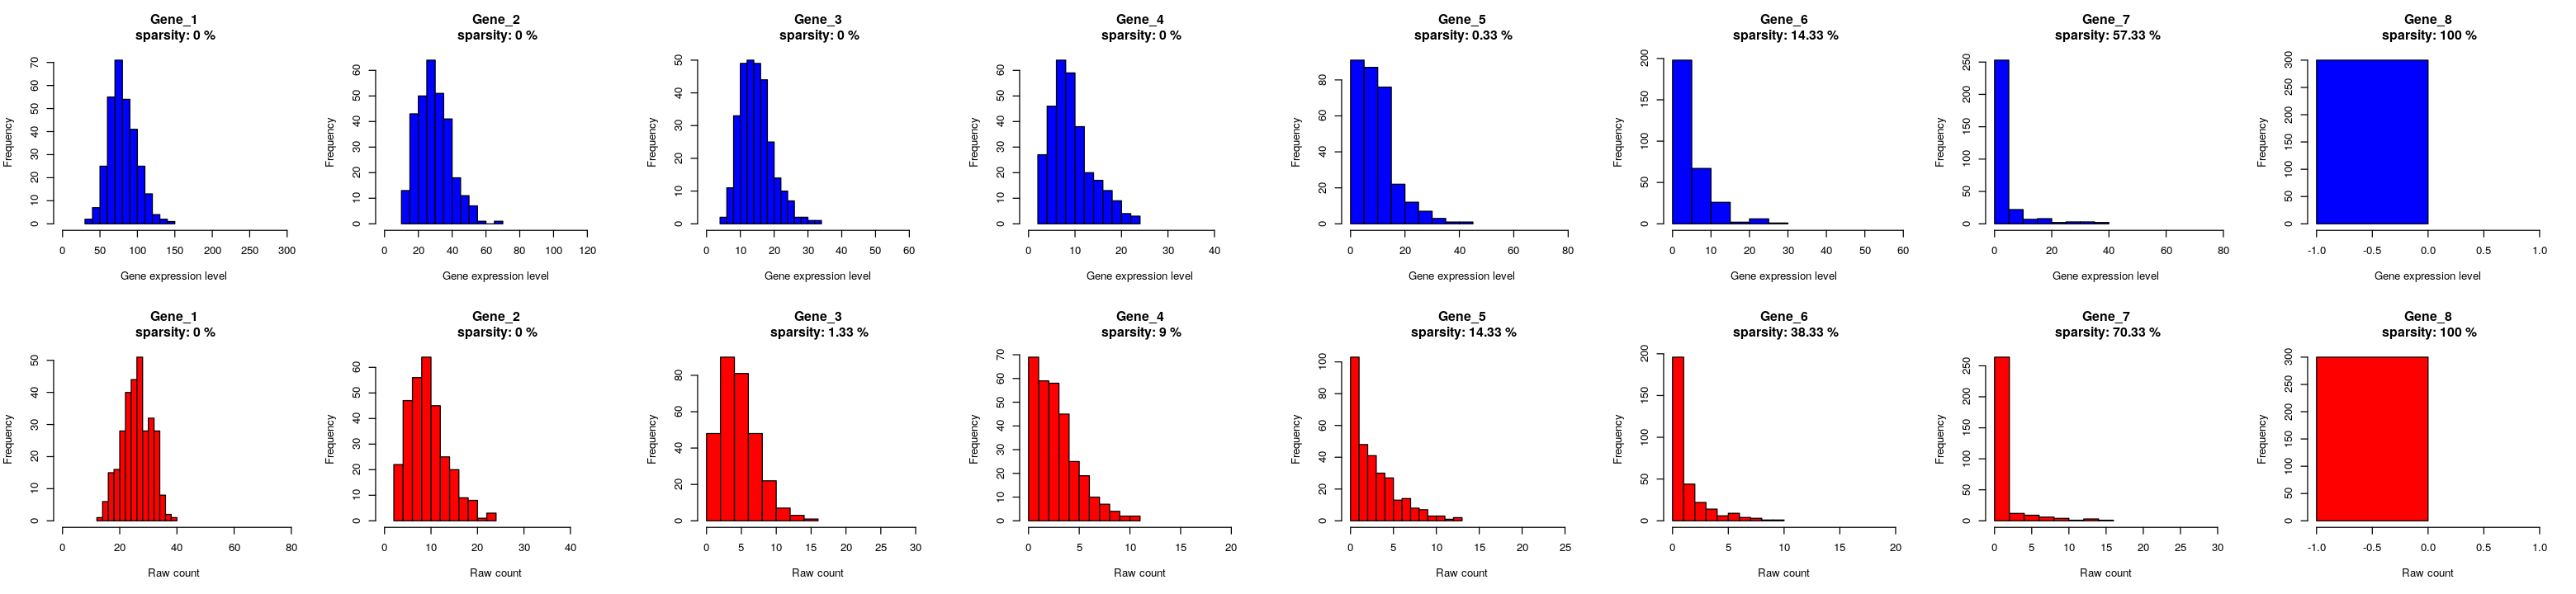

In [80]:
par(mfrow=c(2,8)) # plot layout
options(repr.plot.width=26, repr.plot.height=6) # plot size

# plot histograms of gene expression levels (blue)
plot_histogram(input_matrix = gene_expr, xlabel = "Gene expression level", color = "blue")
# plot histrogram of raw counts (red)
plot_histogram(input_matrix = raw_count, xlabel = "Raw count", color = "red")

In [ ]:
## Save the data in csv format 

In [30]:
write.csv(gene_expr, file = "Example1_gene_expr.csv")
write.csv(raw_count, file = "Example1_raw_count.csv")